In [1]:
### INITIALISATION ###

import numpy as np          # fundamental package for scientific computing
import xarray as xr         # data handling
import glob                 # return all file paths that match a specific pattern
import os                   # provide operating system-related functions
import pop_tools            # to mask region of interest
import gsw                  # compute potential density
import matplotlib.pyplot as plt

# setting up of regional masks
grid_name = 'POP_gx1v7'
region_defs = {
    'North Atlantic and Nordic Seas': [{'match': {'REGION_MASK': [6, 7]},#, 9]}, 
                             'bounds': {'TLAT': [20., 59.]}}],
    'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 59.]}}]
} 
mask_NA = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic and Nordic Seas')
mask_NA = mask_NA.sum('region')

region_defs = {'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}]}
mask_lab_sea = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='Labrador Sea')
mask_lab_sea = mask_lab_sea.sum('region')  

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Compute Labrador density metric

In [17]:
### load data
# composite
sigma_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sigma_composite_annual.nc'
# anomaly
sigma_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sigma_anomaly.nc'

In [18]:
ds_sig_lab = xr.open_dataarray(sigma_annual).roll(nlon=+100).where(mask_lab_sea == 1)

# unweighted mean
sig_lab_unweighted_mean = ds_sig_lab.sel(z_t=slice(5.000000e+02, 1.400497e+05)).mean(dim=('nlat', 'nlon', 'z_t')).values

# weighted mean
ds = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/rho/rho_1001.001.nc').roll(nlon=+100).where(mask_lab_sea == 1)

weighted_sigma = ds_sig_lab.sel(z_t=slice(500, 140049.7)) * ds['dz'].sel(z_t=slice(500, 140049.7)) 
sum_weighted_sigma = weighted_sigma.sum(dim='z_t')
total_depth = ds['dz'].sel(z_t=slice(500, 140049.7)).sum(dim='z_t')
depth_weighted_avg_sigma = sum_weighted_sigma / total_depth

sig_lab_weighted_mean = depth_weighted_avg_sigma.mean(dim=['nlat', 'nlon']).values

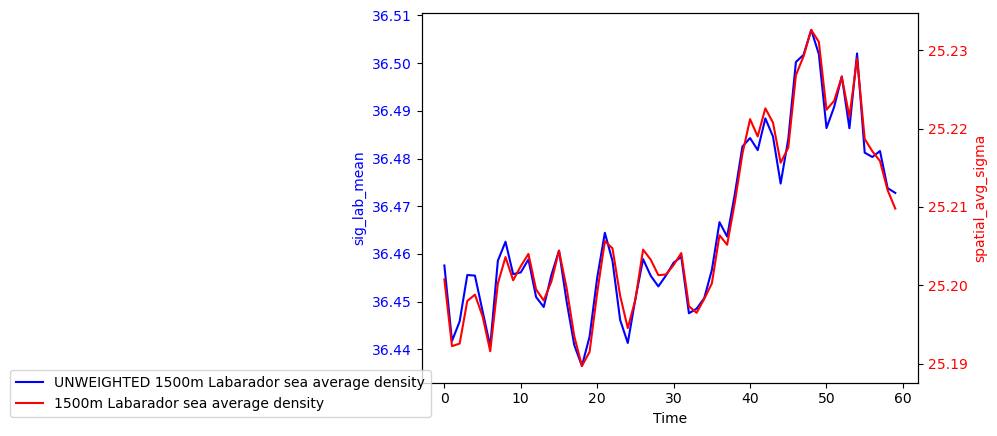

In [19]:
fig, ax1 = plt.subplots()

# Plot sig_lab_mean on the left y-axis
ax1.plot(sig_lab_unweighted_mean, color='b', label='UNWEIGHTED 1500m Labarador sea average density')
ax1.set_xlabel('Time')
ax1.set_ylabel('sig_lab_mean', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(sig_lab_weighted_mean, color='r', label='1500m Labarador sea average density')
ax2.set_ylabel('spatial_avg_sigma', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(0.15, 0.15))

# Display the plot
plt.show()


# Plot location and corresponding cross sections of VVEL

In [ ]:
path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/vvel/'
salt_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/salt/'
temp_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/'
files = sorted(glob.glob(path + '*.nc'))

ds_plot = xr.open_dataset(files[0])

In [2]:
ds_plot = ds_plot.isel(time=slice(0,20)).mean('time').where(mask_NA == 1).roll(nlon=-100)

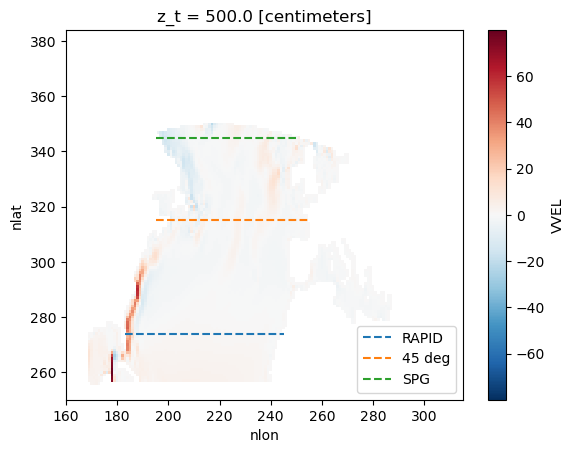

In [3]:
ds_plot.VVEL.isel(z_t=0).plot()

plt.plot([183,245],[274, 274], linestyle='--', label='RAPID')
plt.plot([195,255],[315, 315], linestyle='--', label='45 deg')
plt.plot([195,250],[345, 345], linestyle='--', label='SPG')
#plt.plot([270,270],[348, 382], linestyle='--', label='Nordic Seas')

plt.xlim([160, 315])
plt.ylim([250, 384])

plt.legend(loc='lower right')

plt.show()

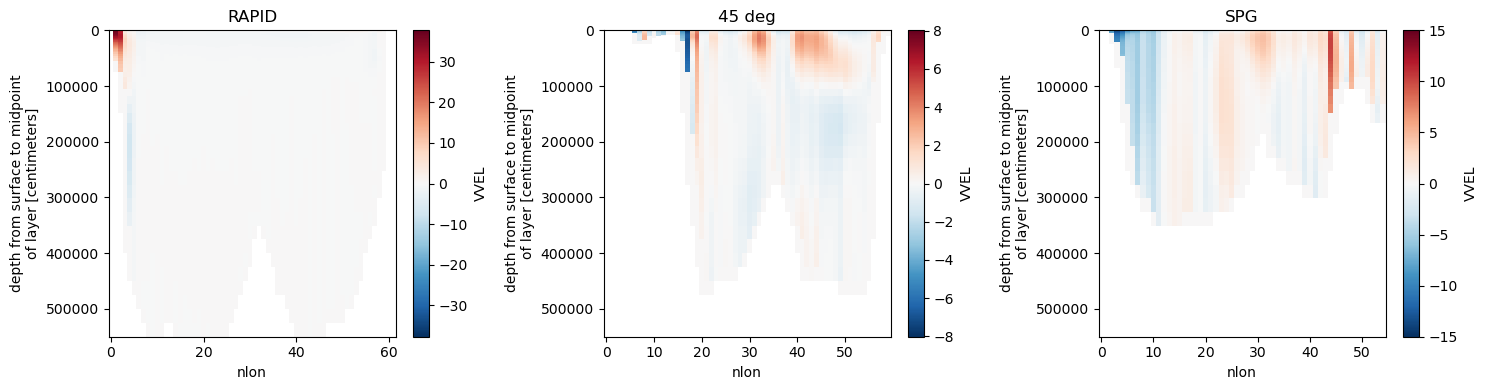

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot for ds_plot1
ds_plot.VVEL.isel(nlat=271, nlon=slice(183, 245)).plot(ax=axes[0], yincrease=False)
axes[0].set_title('RAPID')

# Plot for ds_plot2
ds_plot.VVEL.isel(nlat=315, nlon=slice(195, 255)).plot(ax=axes[1], yincrease=False)
axes[1].set_title('45 deg')

# Plot for ds_plot3
ds_plot.VVEL.isel(nlat=345, nlon=slice(195, 250)).plot(ax=axes[2], yincrease=False)
axes[2].set_title('SPG')

plt.tight_layout()
plt.show()

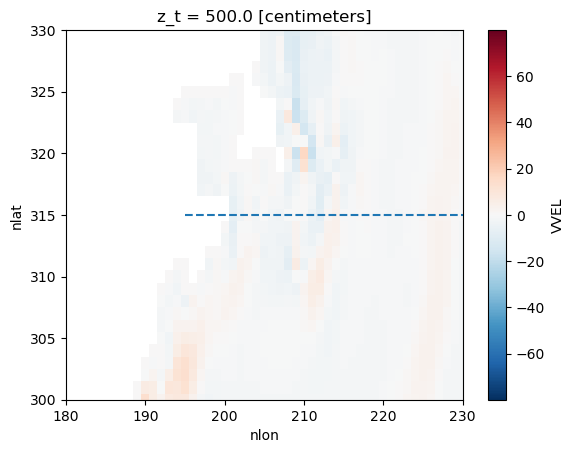

In [5]:
ds_plot.VVEL.isel(z_t=0).plot()
plt.plot([195,255],[315, 315], linestyle='--', label='45 deg')
plt.xlim([180, 230])
plt.ylim([300, 330])
plt.show()